In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_wine
from typing import Union, Tuple
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

plt.rcParams['axes.grid'] = True

Logistic regression is basically the same model as an Adaline but with a different cost function and a sigmoid activation function. \
\
Cost Function: $J(w) = - \sum_{i} y^{(i)}log(\sigma(z^{(i)})) + (1-y^{(i)})log(1-\sigma(z^{(i)}))$\
Activation function: $\sigma(z) = \dfrac{1}{1+e^{-z}}$\
\
Where $z = w_0 + w_1x_1 + ... +w_nx_n$ \
The derivative of the new activation function is the same:
$\dfrac{\partial J(w)}{\partial w_j} = (y - \sigma(z))x_j$

In [2]:
class LogReg:
    """
    lr: learning rate of the perceptron
    epochs: number of epochs to train the perceptron
    batch_size: number of rows considered for each weigts update
    """
    def __init__(self, lr: float = 0.01, epochs: int = 25, batch_size: int = 20):
        self.lr = lr
        self.epochs = epochs
        self.bs = batch_size

    def fit(self, X: Union[np.ndarray, pd.DataFrame] , y: Union[np.ndarray, pd.Series, pd.DataFrame]) -> None:
        self.losses = []
        self.weights = self.weights_initializer(X.shape[1] + 1)

        for epoch in range(self.epochs):

            cost = []
            X, y = self.shuffle_data(X, y)
            res = X.shape[0]%self.bs
            for i in range(int(X.shape[0]/self.bs)):
                cost.append(self.backprop(X[self.bs*i:self.bs*(i+1)], y[self.bs*i:self.bs*(i+1)]))
    
            cost.append(self.backprop(X[-res:], y[-res:]))

            cost = np.array(cost)
            self.losses.append(np.nanmean(cost))

    def weights_initializer(self, dim: int) -> np.ndarray:
        weights = np.random.normal(scale=0.01, size=dim)
        return weights

    def shuffle_data(self, X: Union[np.ndarray, pd.DataFrame], y: Union[np.ndarray, pd.Series, pd.DataFrame]) -> Tuple[np.ndarray, np.ndarray]:
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def forward(self, X: np.ndarray) -> np.ndarray:
        output = X.dot(self.weights[1:]) + self.weights[0]
        return output

    #Added new activation
    def sigmoid(self, Z: np.ndarray) -> np.ndarray:
        sigma = 1/(1+np.exp(-np.clip(Z, -250, 250)))
        return sigma

    #Change update of the parameters respect to new activation function
    def backprop(self, xi: np.ndarray, yi: np.ndarray) -> float:
        output = self.forward(xi)
        error = np.array(yi - self.sigmoid(output))
        self.weights[1:] += self.lr * error.dot(xi)
        self.weights[0] += self.lr * error.sum()

        cost = np.nansum((-yi.dot(np.log(output)) - ((1-yi).dot(np.log(1-output)))))

        return cost
    
    def predict(self, X: Union[np.ndarray, pd.DataFrame]) -> Union[np.ndarray, pd.DataFrame]:
        
        result = self.forward(X)
        result = np.where(result > 0, 1, 0)
        return result

    def plot_loss(self):

        sns.lineplot(x=list(range(1, self.epochs +1)), y=self.losses, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')


In [3]:
data = load_wine()
X, y = data.data, data.target

#Select only 2 targets 
idx = np.where(y<2)
X, y = X[idx], y[idx]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\ggiam\AppData\Local\Temp\ipykernel_17844\1142147134.py:53: RuntimeWarning: invalid value encountered in log
  cost = np.nansum((-yi.dot(np.log(output)) - ((1-yi).dot(np.log(1-output)))))


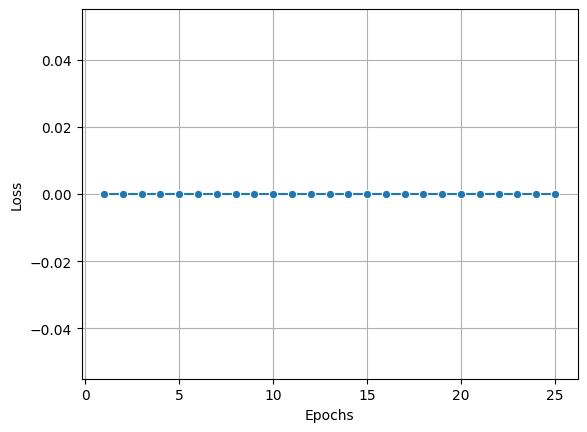

In [4]:
model = LogReg()
model.fit(X_train, y_train)
model.plot_loss()

In [5]:
test_accuracy = accuracy_score(y_test, model.predict(X_test))
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print(f'{train_accuracy = }')
print(f'{test_accuracy = }')

train_accuracy = 1.0
test_accuracy = 1.0


There are some issues on the loss function that returns nan, it could be resolved by a couple of if but I don't care too much about itù